In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
# Read in CSV 
data = pd.read_csv("videoStats.csv", encoding = 'latin-1')

In [3]:
print(re.findall(r"'(.*?)'",data.Title[1],re.DOTALL))

['Bodybuilding & Fitness Motivation - Aesthetic To The Max']


In [29]:
import os
import nltk
from collections import Counter
from nltk.corpus import stopwords

c = Counter()
nonStopWordsCt = Counter()
stopWords = set(stopwords.words('english'))

for x in data.Title:
            wordList = x.split()
            englishList = []
            nonStopWords = []
            for word in wordList:
                if word.isalpha():
                    englishList.append(word.lower())
                    if word not in stopWords:
                        nonStopWords.append(word.lower())
            c += Counter(englishList)
            nonStopWordsCt += Counter(nonStopWords)

print("\nMost Common Words in Titles")
for word, _ in c.most_common(10):
    print(word, c[word])

print("\nNon Stop Words")
for word, _ in nonStopWordsCt.most_common(10):
    print(word, nonStopWordsCt[word])


Most Common Words in Titles
the 877
and 810
to 786
workout 624
for 584
with 553
de 543
gym 543
training 540
in 419

Non Stop Words
workout 624
de 543
gym 543
training 540
fitness 381
the 355
bodybuilding 282
muscle 258
body 250
to 244


In [31]:
c = Counter()
nonStopWordsCt = Counter()
stopWords = set(stopwords.words('english'))

for x in data.Description:
            wordList = x.split()
            englishList = []
            nonStopWords = []
            for word in wordList:
                if word.isalpha():
                    englishList.append(word.lower())
                    if word not in stopWords:
                        nonStopWords.append(word.lower())
            c += Counter(englishList)
            nonStopWordsCt += Counter(nonStopWords)

print("\n 30 Most Common Words in Titles")
for word, _ in c.most_common(10):
    print(word, c[word])

print("\nNon Stop Words")
for word, _ in nonStopWordsCt.most_common(10):
    print(word, nonStopWordsCt[word])


 30 Most Common Words in Titles
the 17423
and 14121
to 13334
a 9770
of 7697
for 6777
in 6742
you 6596
your 4895
on 4871

Non Stop Words
de 4494
i 3179
fitness 2230
training 2153
workout 2051
video 1955
the 1780
get 1751
en 1689
la 1613


In [10]:
lcsdata = data.loc[(data['Description'].str.contains("subscribe")) | 
                   (data['Description'].str.contains("like")) | 
                   (data['Description'].str.contains("comment")) ]

(array([  1.01700000e+03,   6.60000000e+01,   1.50000000e+01,
          1.40000000e+01,   1.00000000e+01,   6.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

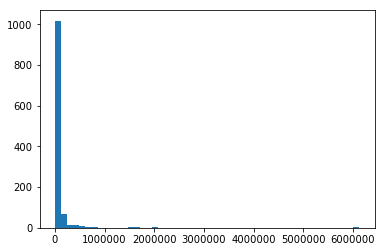

In [18]:
plt.hist(lcsdata['ViewCount'], bins = 50)

In [13]:
data.head()

,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,PublishedAt,Channel Id,Channel Title,Tags,Thumbnail Default
0,QyKYEKrYraI,b'Extreme SIX-PACK ABS Workout w/ Kali Muscle',b'Kali Muscle shows you guys how to get shredd...,25866,1351,3793297,0,2400,2014-06-29T21:32:50.000Z,UCg_tz2iw7_-gf2xIL-DdM2g,Kali Muscle,"['kali muscle', 'hyphy mud', 'muscle up', 'you...",b'https://i.ytimg.com/vi/QyKYEKrYraI/default.jpg'
1,UYJMinNrB7E,b'Bodybuilding & Fitness Motivation - Aestheti...,b'Follow me:\nhttp://instagram.com/shaqx.bb\nh...,8493,335,1666110,0,499,2014-05-12T15:03:07.000Z,UC3uDucFPe-E0I6CfxtHWZ6w,ShaQxTV,"['ShaQx', 'Bodybuilding', 'Motivation', 'Bodyb...",b'https://i.ytimg.com/vi/UYJMinNrB7E/default.jpg'
2,AIZDTGqBa-0,b'How to lose weight and build muscle fast',b'Full 8-12 Week Diet & Training Programs Avai...,6197,399,1292642,0,709,2013-02-01T16:42:09.000Z,UCzPpSrjtR0ByfF9uq2ZTOlw,Alex Los Angeles,"['how to', 'lose weight', 'burn fat', 'belly',...",b'https://i.ytimg.com/vi/AIZDTGqBa-0/default.jpg'
3,VKDTB1F-jRw,"b""Bodybuilding Motivation - Don't Run Away Fro...",b'Subscribe and Stay Tuned for more videos!\n\...,3684,144,1140818,0,209,2011-01-22T10:42:34.000Z,UCiWEGEhbwxz9cb0uTbnUepw,WallEast,"['WallEast', 'Motivation', '2011', 'Tomandandy...",b'https://i.ytimg.com/vi/VKDTB1F-jRw/default.jpg'
4,8Dz39zCtMDs,b'BEST BODIES AT BODYPOWER 2015 (HD)',"b""Aesthetics rule at the Bodypower Expo 2015, ...",3650,126,765380,0,284,2015-05-23T17:00:00.000Z,UCoguzybAI8Fgdj4Aze5tE8w,Fit Media Channel,"['colin wayne', 'steve cook', 'best bodies', '...",b'https://i.ytimg.com/vi/8Dz39zCtMDs/default.jpg'


(array([  1.08700000e+04,   1.93000000e+02,   7.40000000e+01,
          2.10000000e+01,   2.30000000e+01,   1.80000000e+01,
          6.00000000e+00,   8.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

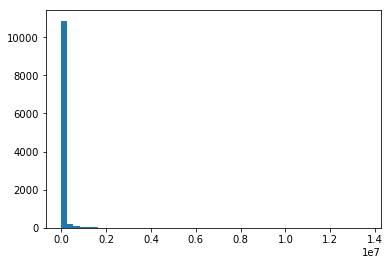

In [20]:
plt.hist(data['ViewCount'],bins = 50)